<a href="https://colab.research.google.com/github/hbgit/machinelearn_tuto/blob/master/Sound/Sound_FASTIA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on https://becominghuman.ai/sound-classification-using-images-68d4770df426

I have used the UrbanSound8k dataset. It contains 8732 labeled sound excerpts of urban sounds from 10 classes. All the audio files are ≤4s which makes it easier to create spectrograms.

https://urbansounddataset.weebly.com/

In [0]:
#wget https://goo.gl/8hY5ER
!wget https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
 

--2019-10-31 22:29:47--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
Resolving zenodo.org (zenodo.org)... 188.184.65.20
Connecting to zenodo.org (zenodo.org)|188.184.65.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘UrbanSound8K.tar.gz’

UrbanSound8K.tar.gz 100%[===================>]   5.61G  20.8MB/s    in 4m 45s  

2019-10-31 22:34:34 (20.1 MB/s) - ‘UrbanSound8K.tar.gz’ saved [6023741708/6023741708]



In [0]:
!ls 

sample_data  UrbanSound8K.tar.gz


In [0]:
!tar xf UrbanSound8K.tar.gz

In [0]:
!ls UrbanSound8K/audio/

fold1  fold10  fold2  fold3  fold4  fold5  fold6  fold7  fold8	fold9


In [0]:
import IPython
IPython.display.Audio("UrbanSound8K/audio/fold1/26270-9-0-35.wav")

In [0]:
labels  = ['air_conditioner','car_horn','children_playing',
           'dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music']

In [0]:
import pandas as pd
import numpy as np

data = pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")

In [0]:
data.shape

(8732, 8)

In [0]:
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [0]:
appended = []
for i in range(1,11):
    appended.append(data[data.fold == i]['class'].value_counts())
    
class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ["fold"+str(x) for x in range(1,11)]
class_distribution

,index,jackhammer,dog_bark,drilling,children_playing,street_music,air_conditioner,engine_idling,siren,car_horn,gun_shot
0,fold1,120,100,100,100,100,100,96,86,36,35
1,fold2,120,100,100,100,100,100,100,91,42,35
2,fold3,120,100,100,100,100,100,107,119,43,36
3,fold4,120,100,100,100,100,100,107,166,59,38
4,fold5,120,100,100,100,100,100,107,71,98,40
5,fold6,68,100,100,100,100,100,107,74,28,46
6,fold7,76,100,100,100,100,100,106,77,28,51
7,fold8,78,100,100,100,100,100,88,80,30,30
8,fold9,82,100,100,100,100,100,89,82,32,31
9,fold10,96,100,100,100,100,100,93,83,33,32


In [0]:
data['class'].value_counts(normalize=True)

dog_bark            0.114521
drilling            0.114521
children_playing    0.114521
street_music        0.114521
jackhammer          0.114521
engine_idling       0.114521
air_conditioner     0.114521
siren               0.106390
car_horn            0.049130
gun_shot            0.042831
Name: class, dtype: float64

In [0]:
!mkdir UrbanSound8K/spectrogram

In [0]:
import os
import struct
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
from pathlib import Path 
import IPython.display as ipd

def path_class(filename):
    excerpt = data[data['slice_file_name'] == filename]
    spectrogram_path = Path('UrbanSound8K/spectrogram/')
    if not os.path.isfile(str(spectrogram_path)+'/fold'+str(excerpt.fold.values[0])):
      os.mkdir(str(spectrogram_path)+'/fold'+str(excerpt.fold.values[0]))
    path_name = os.path.join('UrbanSound8K/audio', 'fold'+str(excerpt.fold.values[0]), filename)
    return path_name, excerpt['class'].values[0]

def wav_plotter(full_path, class_label): 
    spectrogram_path = Path('UrbanSound8K/spectrogram/')  
    rate, wav_sample = wav.read(full_path)        
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('sampling rate: ',rate,'Hz')
    print('bit depth: ',bit_depth)
    print('number of channels: ',wav_sample.shape[1])
    print('duration: ',wav_sample.shape[0]/rate,' second')
    print('number of samples: ',len(wav_sample))
    print('class: ',class_label)
    plt.figure(figsize=(12, 4))     
    p = Path(full_path)
    f_p = str(Path(*p.parts[2:]))
    filename_sp  = spectrogram_path/f_p.replace('.wav','.png')
    print(filename_sp)
    plt.savefig(filename_sp, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close('all')
    plt.plot(wav_sample)
    return ipd.Audio(full_path)

sampling rate:  44100 Hz
bit depth:  16
number of channels:  2
duration:  4.0  second
number of samples:  176400
class:  children_playing
UrbanSound8K/spectrogram/fold5/100263-2-0-117.png


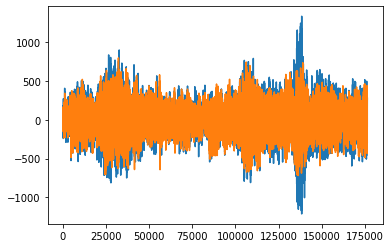

In [0]:
fullpath, label = path_class('100263-2-0-117.wav')
wav_plotter(fullpath,label)

In [0]:
!rm UrbanSound8K/spectrogram/* -rf

In [0]:
pip install soundfile

**Gathering scpetrogram already processed**

In [0]:
!git clone https://gitlab.com/Herberthb12/spectrogram_us8k.git

Cloning into 'spectrogram_us8k'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 69 (delta 46), reused 0 (delta 0)
Unpacking objects: 100% (69/69), done.
Checking out files: 100% (8737/8737), done.


In [0]:
!cp -r spectrogram_us8k/spectrogram/* UrbanSound8K/spectrogram/

In [0]:
!ls 'UrbanSound8K/spectrogram/'

fold1  fold10  fold2  fold3  fold4  fold5  fold6  fold7  fold8	fold9


In [0]:
!mkdir 'UrbanSound8K/data'

In [0]:
import os
import glob
import shutil
from pathlib import Path  

data_path = Path('UrbanSound8K/data/') 
spectrogram_path = Path('UrbanSound8K/spectrogram/')  

def create_fold_directory(fold):
    png_files =  list(Path(spectrogram_path/f'fold{fold}').glob('*.png'))
    os.mkdir(data_path/fold)
    os.mkdir(data_path/fold/'train')
    os.mkdir(data_path/fold/'valid')
    for label in labels:
        # print(label)
    #for label in list(set(labels_used)):
        os.mkdir(data_path/fold/'train'/label)
        os.mkdir(data_path/fold/'valid'/label)
     
    for file in png_files:
        print(file)
        print(file.name)
        label = file.as_posix().split('-')[1]        
        shutil.copyfile(file, data_path/fold/'valid'/labels[int(label)]/file.name) 
        # shutil.copyfile(file, data_path/fold/'valid'/label/file.name)
        # print(data_path/fold/'valid'/label/file.name)
    
    for i in range(1, 11):       
        if str(i) == fold:
            continue
        png_files =  list(Path(spectrogram_path/f'fold{str(i)}').glob('*.png'))
        for file in png_files:
            label = file.as_posix().split('-')[1]
            shutil.copyfile(file, data_path/fold/'train'/labels[int(label)]/file.name)

In [0]:
for i in range(1, 11):
    create_fold_directory(str(i))

UrbanSound8K/spectrogram/fold1/55020-4-0-14.png
55020-4-0-14.png
UrbanSound8K/spectrogram/fold1/43786-3-1-0.png
43786-3-1-0.png
UrbanSound8K/spectrogram/fold1/165645-4-5-0.png
165645-4-5-0.png
UrbanSound8K/spectrogram/fold1/180937-7-3-8.png
180937-7-3-8.png
UrbanSound8K/spectrogram/fold1/193698-2-0-114.png
193698-2-0-114.png
UrbanSound8K/spectrogram/fold1/197318-6-0-0.png
197318-6-0-0.png
UrbanSound8K/spectrogram/fold1/180937-7-3-23.png
180937-7-3-23.png
UrbanSound8K/spectrogram/fold1/83199-9-0-0.png
83199-9-0-0.png
UrbanSound8K/spectrogram/fold1/19026-1-0-0.png
19026-1-0-0.png
UrbanSound8K/spectrogram/fold1/78360-4-0-19.png
78360-4-0-19.png
UrbanSound8K/spectrogram/fold1/108041-9-0-9.png
108041-9-0-9.png
UrbanSound8K/spectrogram/fold1/157867-8-0-4.png
157867-8-0-4.png
UrbanSound8K/spectrogram/fold1/192124-2-0-11.png
192124-2-0-11.png
UrbanSound8K/spectrogram/fold1/157867-8-0-27.png
157867-8-0-27.png
UrbanSound8K/spectrogram/fold1/55020-4-0-5.png
55020-4-0-5.png
UrbanSound8K/spectrogra

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *

In [0]:
#!find 'UrbanSound8K/data/train' -type f
ls 'UrbanSound8K/data/1/train/children_playing'

100263-2-0-117.png  160011-2-0-3.png    187110-2-0-6.png    47019-2-0-55.png
100263-2-0-121.png  160011-2-0-5.png    187110-2-0-8.png    47019-2-0-65.png
100263-2-0-126.png  160011-2-0-7.png    188497-2-0-0.png    47019-2-0-66.png
100263-2-0-137.png  160011-2-0-9.png    188497-2-0-11.png   47019-2-0-69.png
100263-2-0-143.png  160016-2-0-13.png   188497-2-0-17.png   47019-2-0-73.png
100263-2-0-161.png  160016-2-0-25.png   188497-2-0-19.png   49312-2-0-10.png
100263-2-0-36.png   160016-2-0-26.png   188497-2-0-1.png    49312-2-0-16.png
100263-2-0-3.png    160016-2-0-37.png   188497-2-0-23.png   49312-2-0-17.png
101382-2-0-10.png   160016-2-0-40.png   188497-2-0-2.png    49312-2-0-1.png
101382-2-0-12.png   160016-2-0-5.png    188497-2-0-8.png    49312-2-0-2.png
101382-2-0-20.png   160016-2-0-8.png    190893-2-0-10.png   49312-2-0-5.png
101382-2-0-21.png   161005-2-0-0.png    190893-2-0-11.png   49312-2-0-7.png
101382-2-0-29.png   161005-2-0-12.png   190893-2-0-12.png   49313-2-0-10.png
101

In [0]:
#!rm -rf 'UrbanSound8K/data'

In [0]:
data_directory = Path('UrbanSound8K/data')
# don't use any transformations because it doesn't make sense in the case of a spectrogram
# i.e. flipping a spectrogram changes the meaning
data = ImageDataBunch.from_folder(data_directory/'1', ds_tfms=[], size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (7859 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
car_horn,car_horn,car_horn,car_horn,car_horn
Path: UrbanSound8K/data/1;

Valid: LabelList (873 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
car_horn,car_horn,car_horn,car_horn,car_horn
Path: UrbanSound8K/data/1;

Test: None

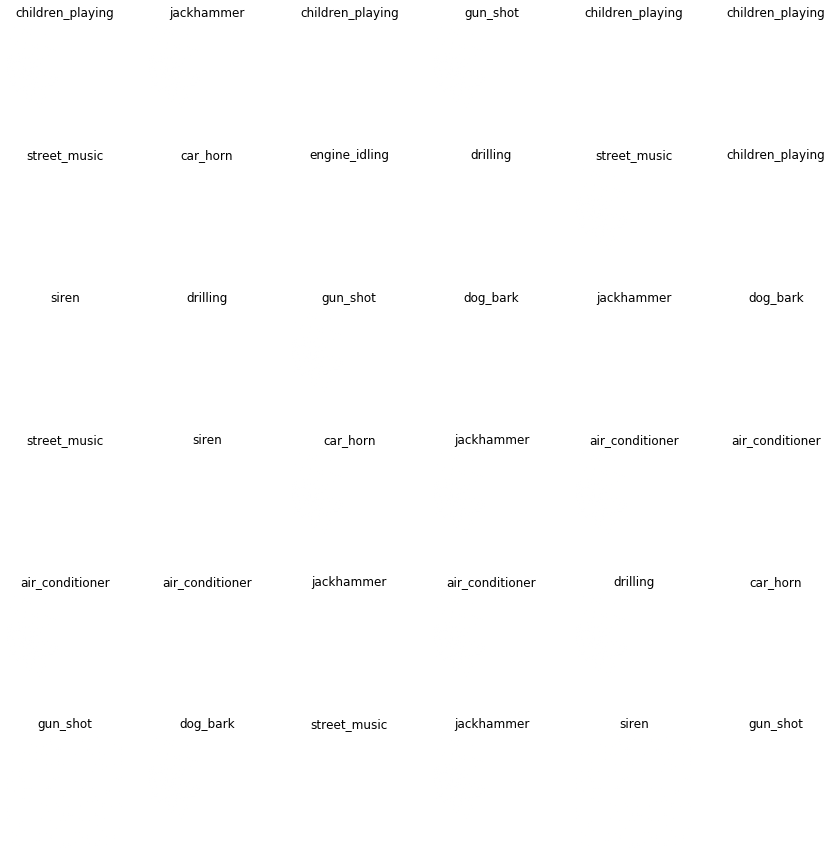

In [0]:
data.show_batch(rows=6, figsize=(12,12))

In [0]:
def process_fold(fold):
    data_directory = Path('UrbanSound8K/data')
    data = ImageDataBunch.from_folder(data_directory/fold, ds_tfms=[], size=224)
    data.normalize(imagenet_stats)
    learn = create_cnn(data, models.resnet34, metrics=error_rate)
    learn.fit_one_cycle(3)
    learn.unfreeze()
    learn.fit_one_cycle(1)
    learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

In [0]:
for i in range(1, 11):
  process_fold(str(i))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:06<00:00, 13.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,3.076795,993.799805,0.885452,23:16
1,2.648241,821.966980,0.901489,23:16
2,2.507273,6.618569,0.885452,23:12


epoch,train_loss,valid_loss,error_rate,time
0,2.451781,4534.177734,0.885452,23:16


epoch,train_loss,valid_loss,error_rate,time
0,2.401603,2809.784912,0.885452,23:19
1,2.384886,911.614502,0.885452,23:27
2,2.371141,109.561745,0.885452,23:20


/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,error_rate,time
0,3.031577,2915.759766,0.887387,23:19


In [0]:
!nvidia-smi --query-gpu=name --format=csv,noheader